Diabetes Prediction Model

In [ ]:
#imported libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the diabetes dataset to pandas datframe
diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
# To view the first 5 rows of dataset
diabetes_data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [ ]:
# Number of rows and columns
diabetes_data.shape

(100000, 8)

In [ ]:
#Summary of dataframe
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


In [ ]:
# Summary statistics of numeric columns
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_data['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


0 means Non-Diabetic 1 means Diabetic

In [ ]:
diabetes_data.groupby('diabetes').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [ ]:
#Dropping duplicate values - checking if there are any duplicate rows and dropping if any
diabetes_data=diabetes_data.drop_duplicates()

In [ ]:
#Checking for missing values,count them and print the sum for every column
diabetes_data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Conclusion - There are no null values in dataset




In [ ]:
# number of rows where age ,HbA1c_level ,blood_glucose_level or bmi is 0 (to check for invalid values)
print(diabetes_data[diabetes_data['age']==0].shape[0])
print(diabetes_data[diabetes_data['HbA1c_level']==0].shape[0])
print(diabetes_data[diabetes_data['blood_glucose_level']==0].shape[0])
print(diabetes_data[diabetes_data['bmi']==0].shape[0])

0
0
0
0


Conclusion - No null values,no duplicate rows,and no zero values in age,HbA1c_level,blood_glucose_level,bmi - dataset is clean for analysis

In [ ]:
#  filter gender and convert to binary
diabetes_data = diabetes_data[diabetes_data['gender'].isin(['Male', 'Female'])]
diabetes_data['gender'] = diabetes_data['gender'].map({'Female': 0, 'Male': 1})

Data Visualization

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

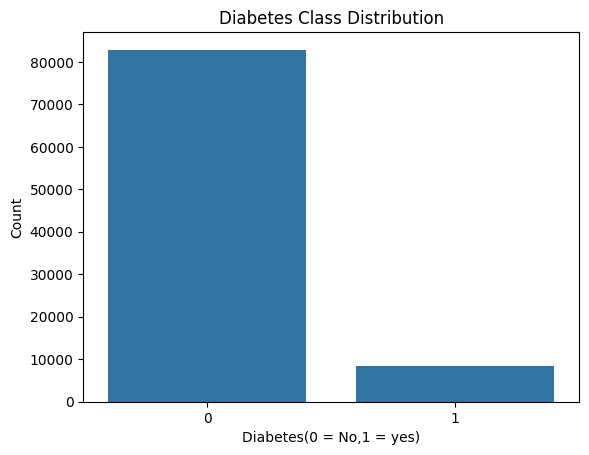

In [ ]:
# Countplot of Outcome Column to visualize class distribution(0 = non-diabetic ,1 = diabetic)
sns.countplot(x='diabetes',data=diabetes_data)
plt.title('Diabetes Class Distribution')
plt.xlabel('Diabetes(0 = No,1 = yes)')
plt.ylabel('Count')
plt.show()

Countplot is to show class imbalance in 'diabetes' column

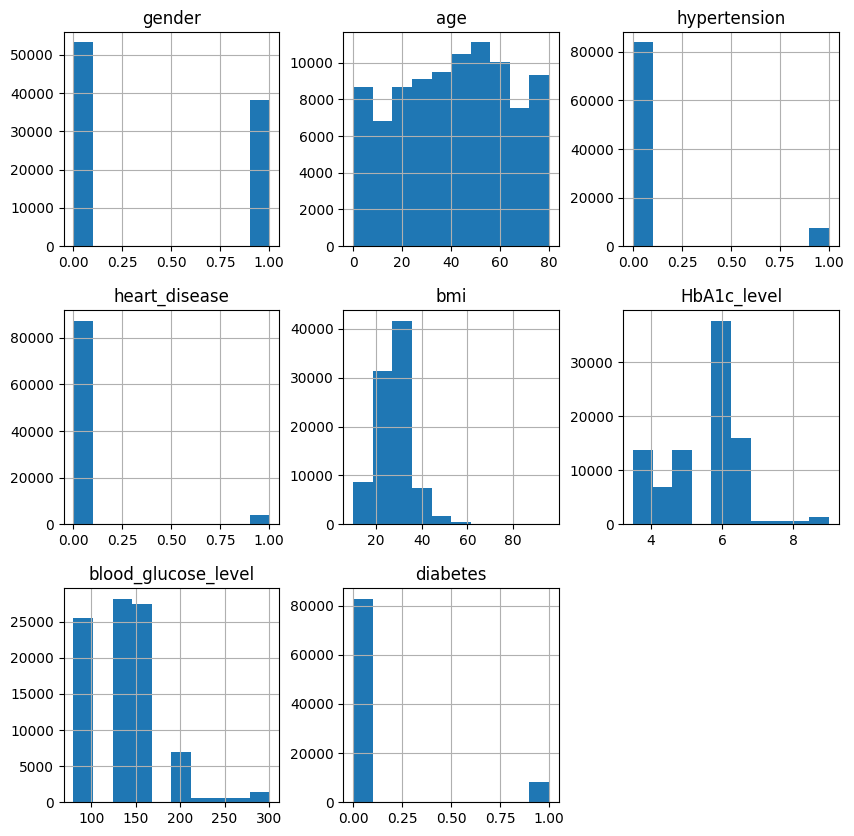

In [ ]:
# Histogram
diabetes_data.hist(bins=10,figsize=(10,10))
plt.show()

This helps us to understand the distribution of values in each feature

<Axes: >

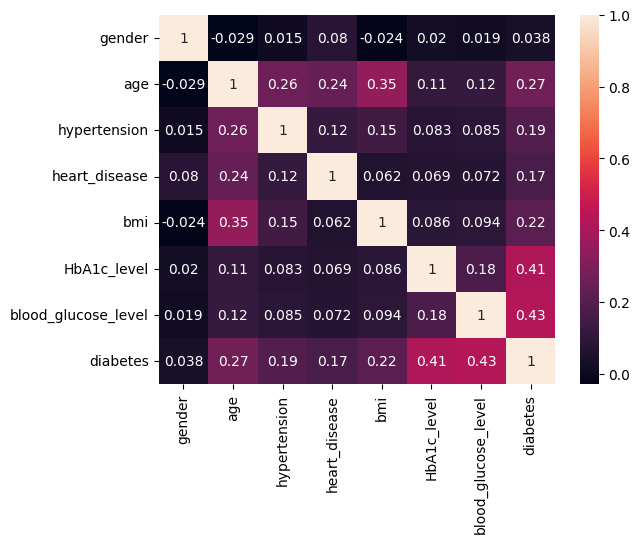

In [ ]:
#Correlation of all features with target 'diabetes'
corrmat = diabetes_data.corr()
sns.heatmap(corrmat,annot=True)


Conclusion - HbA1c_level and blood_glucose_level show a noticable correlation with diabetes

In [ ]:
# separating data and labels
X = diabetes_data.drop(columns = 'diabetes',axis=1)
Y = diabetes_data['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0           0  80.0             0              1  25.19          6.6   
1           0  54.0             0              0  27.32          6.6   
2           1  28.0             0              0  27.32          5.7   
3           0  36.0             0              0  23.45          5.0   
4           1  76.0             1              1  20.14          4.8   
...       ...   ...           ...            ...    ...          ...   
99994       0  36.0             0              0  24.60          4.8   
99996       0   2.0             0              0  17.37          6.5   
99997       1  66.0             0              0  27.83          5.7   
99998       0  24.0             0              0  35.42          4.0   
99999       0  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                  

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 91295, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-8.45771741e-01  1.69567997e+00 -2.97299714e-01 ... -3.07106233e-01
   9.85278320e-01  3.76606555e-02]
 [-8.45771741e-01  5.45837073e-01 -2.97299714e-01 ... -3.55134531e-04
   9.85278320e-01 -1.41927801e+00]
 [ 1.18235211e+00 -6.04005820e-01 -2.97299714e-01 ... -3.55134531e-04
   1.49762492e-01  4.74742254e-01]
 ...
 [ 1.18235211e+00  1.07653379e+00 -2.97299714e-01 ...  7.30923117e-02
   1.49762492e-01  4.01895321e-01]
 [-8.45771741e-01 -7.80904727e-01 -2.97299714e-01 ...  1.16616313e+00
  -1.42843407e+00 -9.33631785e-01]
 [-8.45771741e-01  6.78511253e-01 -2.97299714e-01 ... -7.04586530e-01
   9.85278320e-01 -1.17645490e+00]]


In [ ]:
X = standardized_data
Y = diabetes_data['diabetes']

In [ ]:
print(X)
print(Y)

[[-8.45771741e-01  1.69567997e+00 -2.97299714e-01 ... -3.07106233e-01
   9.85278320e-01  3.76606555e-02]
 [-8.45771741e-01  5.45837073e-01 -2.97299714e-01 ... -3.55134531e-04
   9.85278320e-01 -1.41927801e+00]
 [ 1.18235211e+00 -6.04005820e-01 -2.97299714e-01 ... -3.55134531e-04
   1.49762492e-01  4.74742254e-01]
 ...
 [ 1.18235211e+00  1.07653379e+00 -2.97299714e-01 ...  7.30923117e-02
   1.49762492e-01  4.01895321e-01]
 [-8.45771741e-01 -7.80904727e-01 -2.97299714e-01 ...  1.16616313e+00
  -1.42843407e+00 -9.33631785e-01]
 [-8.45771741e-01  6.78511253e-01 -2.97299714e-01 ... -7.04586530e-01
   9.85278320e-01 -1.17645490e+00]]
0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 91295, dtype: int64


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(91295, 7) (73036, 7) (18259, 7)


Training the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(accuracy_score(Y_test, knn.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9684812968946821
0.9625937893641492
[[16459   111]
 [  572  1117]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16570
           1       0.91      0.66      0.77      1689

    accuracy                           0.96     18259
   macro avg       0.94      0.83      0.87     18259
weighted avg       0.96      0.96      0.96     18259



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
# SVM
svc = SVC(probability=False)
parameter = {
    "gamma":[0.001, 0.01, 0.1],
    'C': [0.1, 1, 10]
}

grid_search = RandomizedSearchCV(svc, parameter,n_iter=5,cv=3,n_jobs=-1)
grid_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1]})

In [ ]:
# best_parameter
grid_search.best_params_

{'gamma': 0.1, 'C': 10}

In [ ]:
grid_search.best_score_

np.float64(0.9625116495175882)

In [ ]:
svc = SVC(C=10, gamma = 0.1, probability=False)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(accuracy_score(Y_test, svc.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9593761980393231
0.9604030888876718
[[16542    28]
 [  695   994]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16570
           1       0.97      0.59      0.73      1689

    accuracy                           0.96     18259
   macro avg       0.97      0.79      0.86     18259
weighted avg       0.96      0.96      0.96     18259



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
Y_pred = xgb.predict(X_test)
print(accuracy_score(Y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(accuracy_score(Y_test, xgb.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9696998740347226
0.9705898461032916
[[16565     5]
 [  532  1157]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16570
           1       1.00      0.69      0.81      1689

    accuracy                           0.97     18259
   macro avg       0.98      0.84      0.90     18259
weighted avg       0.97      0.97      0.97     18259



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
Y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(Y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(Y_test, rand_clf.predict(X_test))
print(accuracy_score(Y_test, rand_clf.predict(X_test)))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9732049947970863
0.9706446136152035
[[16548    22]
 [  514  1175]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16570
           1       0.98      0.70      0.81      1689

    accuracy                           0.97     18259
   macro avg       0.98      0.85      0.90     18259
weighted avg       0.97      0.97      0.97     18259



In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Random Forest Classifier','XgBoost'],
    'Score': [100*round(knn_acc,4), 100*round(svc_acc,4),100*round(rand_acc,4),100*round(xgb_acc,4)]

})
models.sort_values(by = 'Score', ascending = True)

,Model,Score
1,SVM,96.04
0,KNN,96.26
2,Random Forest Classifier,97.06
3,XgBoost,97.06


In [ ]:
import joblib
#save model
joblib.dump(rand_clf,'random_forest_classifier.pkl')

['random_forest_classifier.pkl']

In [ ]:
#load model
loaded_model = joblib.load('random_forest_classifier.pkl')

In [ ]:
#Use loaded model to predict
Y_pred_loaded = loaded_model.predict(X_test)

In [ ]:
input_data = (1,76,0,1,20.8,8.2,300)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.18235211  1.51878106 -0.29729971  4.73508027 -0.93933033  2.47063979
   3.92283042]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
